In [1]:
import os
import sys
import numpy as np
import pandas as pd
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aqiGDL
%matplotlib inline

import datetime
import textwrap

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
colors = ['7A76C2', 'ff6e9c98', 'f62196', '18c0c4', 'f3907e', '66E9EC']

In [16]:
G = ox.graph_from_bbox(20.7900,20.523110,-103.2400,-103.4700)
edges = ox.graph_to_gdfs(G, nodes=False)

In [3]:
gdf = aqiGDL.gdf_from_db('smartcitizen', 'public')
gdf

,device_id,param,unit,lon,lat,date,value,geometry
0,13483,Total Volatile Organic Compounds Digital Indoo...,ppb,-103.351588,20.685147,2021-03-03T15:00:38Z,23628.451613,POINT (671692.111 2288175.175)
1,13483,Total Volatile Organic Compounds Digital Indoo...,ppb,-103.351588,20.685147,2021-03-03T14:00:08Z,29206.000000,POINT (671692.111 2288175.175)
2,13483,Total Volatile Organic Compounds Digital Indoo...,ppb,-103.351588,20.685147,2021-03-03T13:00:51Z,29206.000000,POINT (671692.111 2288175.175)
3,13483,Total Volatile Organic Compounds Digital Indoo...,ppb,-103.351588,20.685147,2021-03-03T12:00:49Z,29206.000000,POINT (671692.111 2288175.175)
4,13483,Total Volatile Organic Compounds Digital Indoo...,ppb,-103.351588,20.685147,2021-03-03T11:00:50Z,29206.000000,POINT (671692.111 2288175.175)
...,...,...,...,...,...,...,...,...
277281,13772,Temperature,ºC,-103.413618,20.668877,2021-02-21T01:00:32Z,19.480167,POINT (665247.641 2286309.678)
277282,13772,Temperature,ºC,-103.413618,20.668877,2021-02-21T00:00:26Z,19.575833,POINT (665247.641 2286309.678)
277283,13772,Temperature,ºC,-103.413618,20.668877,2021-02-20T23:00:16Z,19.710333,POINT (665247.641 2286309.678)
277284,13772,Temperature,ºC,-103.413618,20.668877,2021-02-20T22:00:12Z,19.777000,POINT (665247.641 2286309.678)


In [22]:
gdf_est = gdf[['device_id','lon','lat']].groupby('device_id').mean()
gdf_est = gpd.GeoDataFrame(
    gdf_est, geometry=gpd.points_from_xy(gdf_est.lon, gdf_est.lat))
gdf_est.head(2)

,lon,lat,geometry
device_id,,,
13483,-103.351588,20.685147,POINT (-103.35159 20.68515)
13492,-103.389891,20.651647,POINT (-103.38989 20.65165)


In [6]:
gdf_param = gdf.loc[(gdf.device_id==13771)&(gdf.param=='Particle Matter PM 10')]

In [7]:
gdf_param['date'] = pd.to_datetime(gdf_param['date'])
gdf_param.set_index('date',inplace=True)
gdf_param = gdf_param.resample('H').mean()
gdf_param.head(5)

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,device_id,lon,lat,value
date,,,,
2021-02-20 21:00:00+00:00,13771.0,-103.427141,20.68816,42.852941
2021-02-20 22:00:00+00:00,13771.0,-103.427141,20.68816,32.583333
2021-02-20 23:00:00+00:00,13771.0,-103.427141,20.68816,28.016667
2021-02-21 00:00:00+00:00,13771.0,-103.427141,20.68816,23.683333
2021-02-21 01:00:00+00:00,13771.0,-103.427141,20.68816,24.016667


In [8]:
gdf_param.reset_index(inplace=True)
gdf_param['FECHA'] = gdf_param.date.dt.date
gdf_param.FECHA = gdf_param.FECHA.astype('str')
gdf_param['HORA'] = gdf_param.date.dt.time
gdf_param['FECHA_tmp'] = gdf_param.apply(lambda row: '2018-'+str(row.loc['FECHA'][5:7])+str(row.loc['FECHA'][7:]), axis=1)
print(gdf_param.shape)
gdf_param.head(5)

,date,device_id,lon,lat,value,FECHA,HORA,FECHA_tmp
0,2021-02-20 21:00:00+00:00,13771.0,-103.427141,20.68816,42.852941,2021-02-20,21:00:00,2018-02-20
1,2021-02-20 22:00:00+00:00,13771.0,-103.427141,20.68816,32.583333,2021-02-20,22:00:00,2018-02-20
2,2021-02-20 23:00:00+00:00,13771.0,-103.427141,20.68816,28.016667,2021-02-20,23:00:00,2018-02-20
3,2021-02-21 00:00:00+00:00,13771.0,-103.427141,20.68816,23.683333,2021-02-21,00:00:00,2018-02-21
4,2021-02-21 01:00:00+00:00,13771.0,-103.427141,20.68816,24.016667,2021-02-21,01:00:00,2018-02-21


In [9]:
df = aqiGDL.download_simaj_clean_data(time_period='hour')
df.head(5)

,FECHA,HORA,PARAM,EST_SIMAJ,CONC,LONG,LAT
1314599,2014-01-01,11:00,SO2,SFE,0.001,-103.377179,20.529149
1314394,2014-01-01,07:00,SO2,CEN,0.012,-103.333336,20.673765
1314395,2014-01-01,07:00,SO2,VAL,0.003,-103.398551,20.680193
1314396,2014-01-01,07:00,SO2,AGU,NaN,-103.416431,20.631268
1314397,2014-01-01,07:00,SO2,MIR,0.008,-103.343333,20.614444


In [21]:
simaj_est = df[['EST_SIMAJ','LONG','LAT']].groupby('EST_SIMAJ').mean()
simaj_est = gpd.GeoDataFrame(
    simaj_est, geometry=gpd.points_from_xy(simaj_est.LONG, simaj_est.LAT))
simaj_est = simaj_est.set_crs("EPSG:4326")
simaj_est.head(2)

,LONG,LAT,geometry
EST_SIMAJ,,,
AGU,-103.416431,20.631268,POINT (-103.41643 20.63127)
ATM,-103.355435,20.719674,POINT (-103.35543 20.71967)


In [10]:
df_test = df.copy()
df_test['FECHA'] = pd.to_datetime(df_test['FECHA'])
df_test.FECHA = df_test.FECHA.astype('str')
df_test['HORA'] = pd.to_datetime(df_test['HORA'])
df_test['HORA'] = df_test.HORA.dt.time
df_test.head(5)

,FECHA,HORA,PARAM,EST_SIMAJ,CONC,LONG,LAT
1314599,2014-01-01,11:00:00,SO2,SFE,0.001,-103.377179,20.529149
1314394,2014-01-01,07:00:00,SO2,CEN,0.012,-103.333336,20.673765
1314395,2014-01-01,07:00:00,SO2,VAL,0.003,-103.398551,20.680193
1314396,2014-01-01,07:00:00,SO2,AGU,NaN,-103.416431,20.631268
1314397,2014-01-01,07:00:00,SO2,MIR,0.008,-103.343333,20.614444


In [12]:
conc = []
long_int = gdf_param.iloc[10].lon
lat_int = gdf_param.iloc[10].lat

for i in range(len(gdf_param)):
    fecha = str(gdf_param.iloc[i].FECHA_tmp)
    hora = gdf_param.iloc[i].HORA
    
    df_tmp = df_test.loc[(df_test.PARAM=='PM10')&(df_test.FECHA==fecha)&(df_test.HORA==hora)]
    
    conc.append(aqiGDL.interpolate_atpoint(long_int, lat_int, df_tmp))

In [14]:
gdf_param['simaj'] = conc

In [15]:
gdf_param

,date,device_id,lon,lat,value,FECHA,HORA,FECHA_tmp,simaj
0,2021-02-20 21:00:00+00:00,13771.0,-103.427141,20.68816,42.852941,2021-02-20,21:00:00,2018-02-20,29.188312
1,2021-02-20 22:00:00+00:00,13771.0,-103.427141,20.68816,32.583333,2021-02-20,22:00:00,2018-02-20,29.066516
2,2021-02-20 23:00:00+00:00,13771.0,-103.427141,20.68816,28.016667,2021-02-20,23:00:00,2018-02-20,26.925526
3,2021-02-21 00:00:00+00:00,13771.0,-103.427141,20.68816,23.683333,2021-02-21,00:00:00,2018-02-21,22.005782
4,2021-02-21 01:00:00+00:00,13771.0,-103.427141,20.68816,24.016667,2021-02-21,01:00:00,2018-02-21,21.121492
...,...,...,...,...,...,...,...,...,...
254,2021-03-03 11:00:00+00:00,13771.0,-103.427141,20.68816,12.116667,2021-03-03,11:00:00,2018-03-03,66.283115
255,2021-03-03 12:00:00+00:00,13771.0,-103.427141,20.68816,13.150000,2021-03-03,12:00:00,2018-03-03,58.775670
256,2021-03-03 13:00:00+00:00,13771.0,-103.427141,20.68816,16.400000,2021-03-03,13:00:00,2018-03-03,50.144781
257,2021-03-03 14:00:00+00:00,13771.0,-103.427141,20.68816,21.183333,2021-03-03,14:00:00,2018-03-03,45.623957


In [46]:
def graph_smartcitizen(device, df_sck, gdf_simaj, gdf_est, edges, save=False):

    fig, axes = plt.subplots(1,2,figsize=(24,8), sharex=True)
    
    axes[1].scatter(df_sck.index, df_sck['value'], label='PM10')
    axes[1].plot(df_sck.index, df_sck['value'], '--', zorder=1, color='white', alpha=0.35)
    
    axes[1].scatter(df_sck.index, df_sck['simaj'], color='green', label='PM10')
    axes[1].plot(df_sck.index, df_sck['simaj'], '--', zorder=1, color='green', alpha=0.35)
    
    
    title = textwrap.fill('PM10', 35)
    axes[1].set_title(title,fontsize=20)
    axes[1].tick_params(axis='x',labelrotation=45)


    x_ticks = np.arange(0, len(df_sck.date),15)

    a00 = axes[0]
    shax = a00.get_shared_x_axes()
    shax.remove(a00)
    edges.plot(ax=axes[0], color='#e8e9eb',linewidth=0.1, zorder=-1)
    edges[(edges['highway']=='primary') | (edges['highway']=='secondary')].plot(ax=axes[0], color='#e8e9eb',linewidth=0.5, zorder=0)
    gdf_simaj.plot(ax=axes[0], color='k', alpha=0.85, zorder=1)
    gdf_est[gdf_est.index==device].plot(ax=axes[0], color='#ba0d38', alpha=0.85, zorder=2, markersize=90)
    axes[0].axis('off')
    estacion = device
    fecha_1 = df_sck.date.min().strftime("%Y-%m-%d")
    fecha_2 = df_sck.date.max().strftime("%Y-%m-%d")
    fig.suptitle(f'Device: {estacion}\n{fecha_1} -- {fecha_2}', fontsize=30)

    if save==True:
        plt.savefig(f'{device}_{fecha_1}_{fecha_2}.png',dpi=300)

    return plt.show()

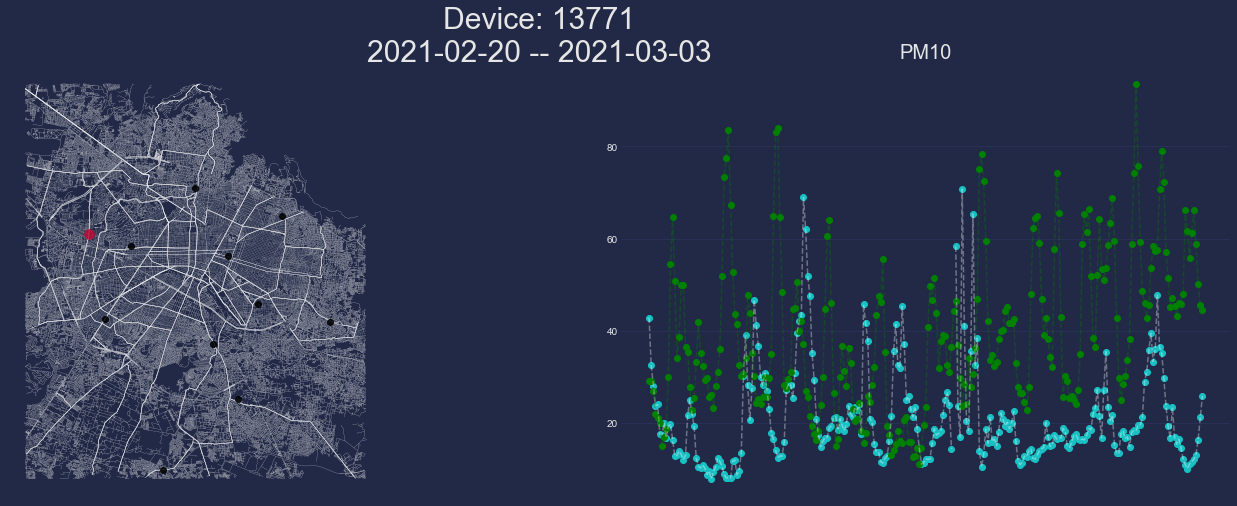

In [47]:
graph_smartcitizen(13771, gdf_param, simaj_est, gdf_est, edges)

In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

gdf_param_nonan = gdf_param.dropna()

acc_test = r2_score(gdf_param_nonan.value, gdf_param_nonan.simaj)
mse_test = mean_squared_error(gdf_param_nonan.value, gdf_param_nonan.simaj)
mae_test = mean_absolute_error(gdf_param_nonan.value, gdf_param_nonan.simaj)
rmse_test = mean_squared_error(gdf_param_nonan.value, gdf_param_nonan.simaj, squared=False)

In [42]:
acc_test

-5.874444152697128

In [43]:
mse_test

807.0920893532117

In [44]:
mae_test

22.877958735130285

In [45]:
rmse_test

28.409366225827913